In [29]:
!pip install pyspark

1. Setup and Data Preparation

● Install and configure PySpark in your environment.

● Initialize a Spark session and load the Online News Popularity dataset into a PySpark DataFrame.

● Familiarize yourself with the dataset's structure and types of variables available.

In [30]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
            .appName("Online News Popularity") \
            .getOrCreate()

In [31]:
data = spark.read.csv("OnlineNewsPopularity.csv", header=True, inferSchema=True)
data.show(5)

+--------------------+----------+---------------+-----------------+----------------+-----------------+-------------------------+----------+---------------+---------+-----------+---------------------+-------------+--------------------------+------------------------------+--------------------+-----------------------+---------------------+----------------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+--------------------------+--------------------------+---------------------------+------------------+-------------------+---------------------+--------------------+------------------+--------------------+------------------+-----------+---------------+---------------+---------------+---------------+---------------+--------------------+--------------------------+---------------------------+---------------------------+--------------------+--------------------+----------------------+----------------------+----------------------+-

In [32]:
data.describe().show()

+-------+--------------------+------------------+------------------+------------------+------------------+-----------------+-------------------------+------------------+------------------+-----------------+------------------+---------------------+------------------+--------------------------+------------------------------+--------------------+-----------------------+---------------------+----------------------+-----------------+------------------+-----------------+-----------------+-----------------+------------------+------------------+-----------------+------------------+--------------------------+--------------------------+---------------------------+-------------------+-------------------+---------------------+--------------------+-------------------+--------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+--------------------+--------------------------+---------------------------

2. Data Preprocessing

● Perform data cleaning, including dealing with missing values and any irrelevant features.

● Since the dataset contains URL data as non-predictive, ensure this is excluded from your analysis.

● Convert the dataset's target variable (shares) into a binary outcome for classification (popular vs. not
popular) based on a threshold you define (e.g., median value).

In [33]:
data = data.drop("url")
data = data.dropna()
data.show()

+----------+---------------+-----------------+----------------+-----------------+-------------------------+----------+---------------+---------+-----------+---------------------+-------------+--------------------------+------------------------------+--------------------+-----------------------+---------------------+----------------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+--------------------------+--------------------------+---------------------------+------------------+-------------------+---------------------+--------------------+------------------+--------------------+------------------+-----------+---------------+---------------+---------------+---------------+---------------+--------------------+--------------------------+---------------------------+---------------------------+--------------------+--------------------+----------------------+----------------------+----------------------+----------------------

In [34]:
data = data.drop("url")
data = data.dropna()
data.show()

+----------+---------------+-----------------+----------------+-----------------+-------------------------+----------+---------------+---------+-----------+---------------------+-------------+--------------------------+------------------------------+--------------------+-----------------------+---------------------+----------------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+--------------------------+--------------------------+---------------------------+------------------+-------------------+---------------------+--------------------+------------------+--------------------+------------------+-----------+---------------+---------------+---------------+---------------+---------------+--------------------+--------------------------+---------------------------+---------------------------+--------------------+--------------------+----------------------+----------------------+----------------------+----------------------

In [35]:
data.printSchema()

root
 |--  timedelta: double (nullable = true)
 |--  n_tokens_title: double (nullable = true)
 |--  n_tokens_content: double (nullable = true)
 |--  n_unique_tokens: double (nullable = true)
 |--  n_non_stop_words: double (nullable = true)
 |--  n_non_stop_unique_tokens: double (nullable = true)
 |--  num_hrefs: double (nullable = true)
 |--  num_self_hrefs: double (nullable = true)
 |--  num_imgs: double (nullable = true)
 |--  num_videos: double (nullable = true)
 |--  average_token_length: double (nullable = true)
 |--  num_keywords: double (nullable = true)
 |--  data_channel_is_lifestyle: double (nullable = true)
 |--  data_channel_is_entertainment: double (nullable = true)
 |--  data_channel_is_bus: double (nullable = true)
 |--  data_channel_is_socmed: double (nullable = true)
 |--  data_channel_is_tech: double (nullable = true)
 |--  data_channel_is_world: double (nullable = true)
 |--  kw_min_min: double (nullable = true)
 |--  kw_max_min: double (nullable = true)
 |--  kw_avg

In [36]:
median_shares = data.approxQuantile(" shares", [0.5], 0.01)[0]
data = data.withColumn("popularity", (data[" shares"] >= median_shares).cast("integer"))

3. Exploratory Data Analysis (EDA)

● Conduct EDA to understand the characteristics of popular and non-popular articles.

● Analyze the distribution of key features and their impact on news popularity.

In [37]:
data.groupBy("popularity").count().show()
data.describe().show()

+----------+-----+
|popularity|count|
+----------+-----+
|         1|21154|
|         0|18490|
+----------+-----+

+-------+------------------+------------------+------------------+------------------+-----------------+-------------------------+------------------+------------------+-----------------+------------------+---------------------+------------------+--------------------------+------------------------------+--------------------+-----------------------+---------------------+----------------------+-----------------+------------------+-----------------+-----------------+-----------------+------------------+------------------+-----------------+------------------+--------------------------+--------------------------+---------------------------+-------------------+-------------------+---------------------+--------------------+-------------------+--------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-

<ipython-input-38-01a114affb84>:10: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.histplot(data=data.toPandas(), x=feature, hue="popularity", kde=True, bins=30, alpha=0.5, palette=custom_palette)


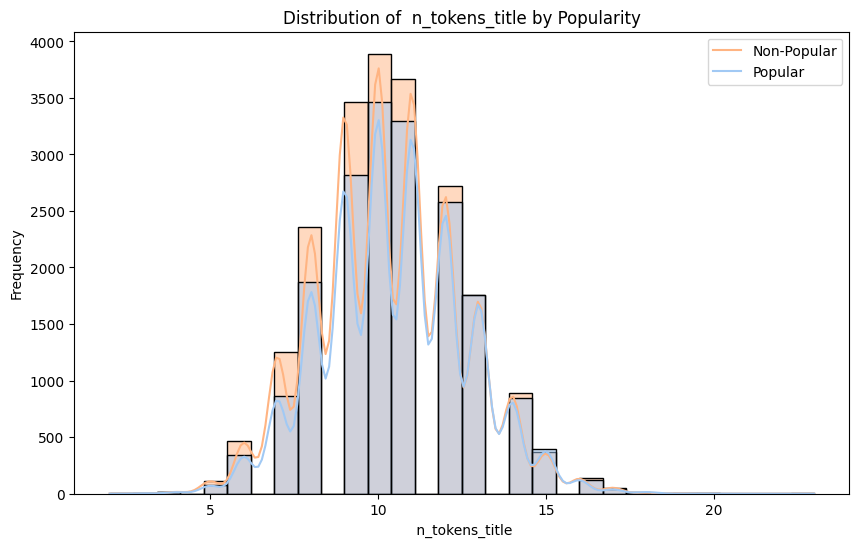

<ipython-input-38-01a114affb84>:10: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.histplot(data=data.toPandas(), x=feature, hue="popularity", kde=True, bins=30, alpha=0.5, palette=custom_palette)


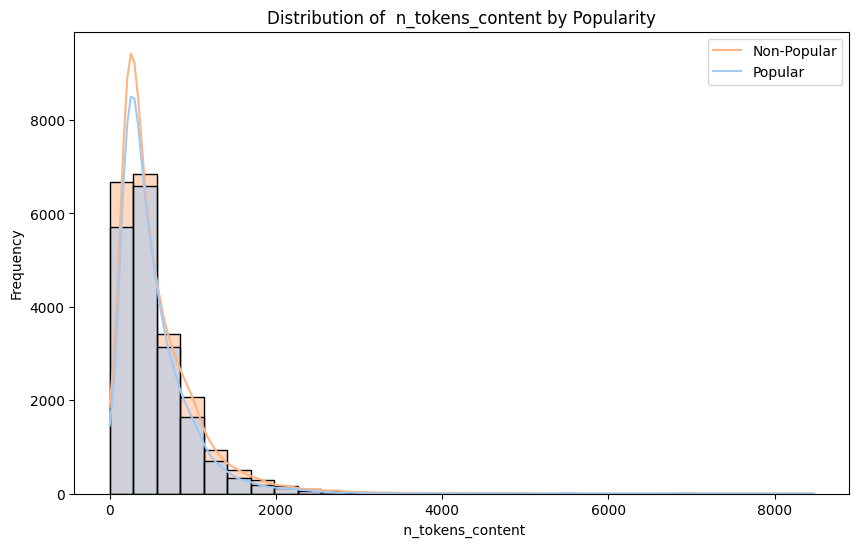

<ipython-input-38-01a114affb84>:10: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.histplot(data=data.toPandas(), x=feature, hue="popularity", kde=True, bins=30, alpha=0.5, palette=custom_palette)


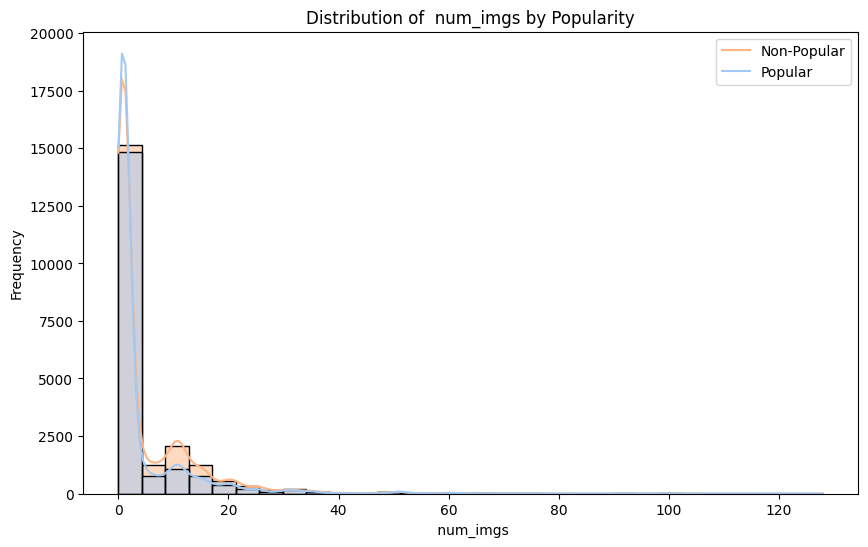

<ipython-input-38-01a114affb84>:10: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.histplot(data=data.toPandas(), x=feature, hue="popularity", kde=True, bins=30, alpha=0.5, palette=custom_palette)


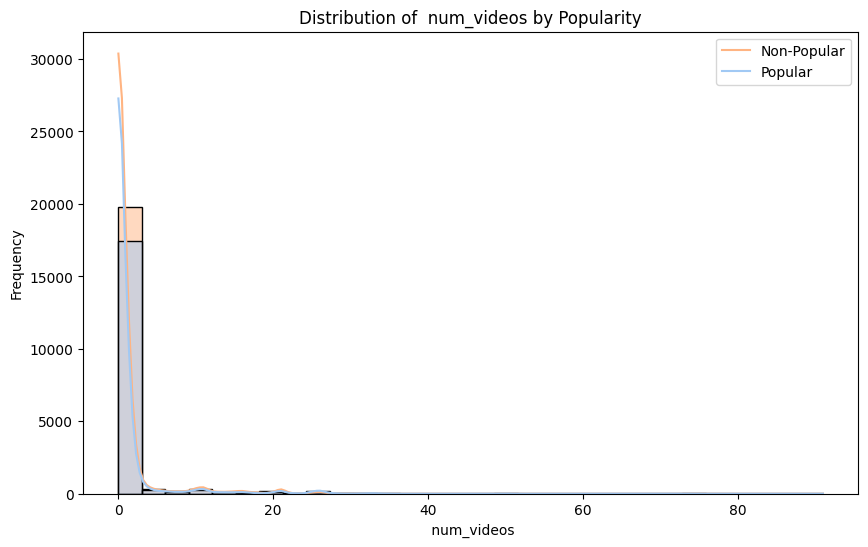

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

custom_palette = sns.color_palette("pastel")
# Relationship between shares and other numerical features
numeric_features = [" n_tokens_title", " n_tokens_content", " num_imgs", " num_videos"]

for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data.toPandas(), x=feature, hue="popularity", kde=True, bins=30, alpha=0.5, palette=custom_palette)
    plt.title(f"Distribution of {feature} by Popularity")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.legend(["Non-Popular", "Popular"])
    plt.show()


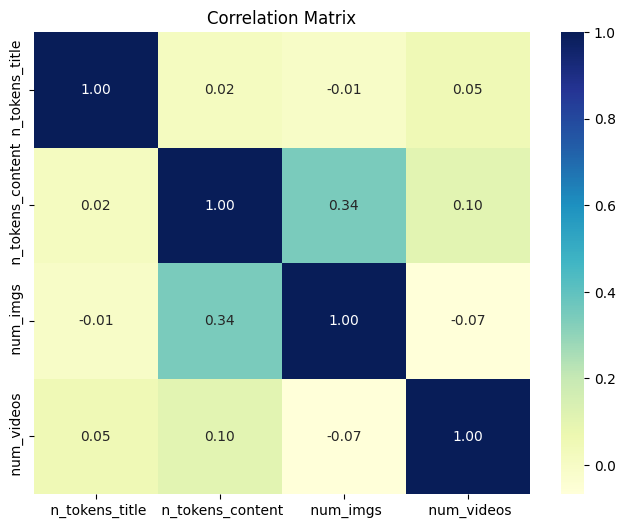

In [39]:
numeric_data = data.select(numeric_features)
correlation_matrix = numeric_data.toPandas().corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

4. Feature Engineering

● Create new features that could potentially enhance model performance, such as article length categories, weekday of publication, etc.

● Use VectorAssembler to combine all feature columns into a single vector column.

In [58]:
from pyspark.ml.feature import Bucketizer

bucketizer = Bucketizer(splits=[0, 500, 1000, float('inf')], inputCol=" n_tokens_content", outputCol="article_length_cat")
data = bucketizer.transform(data)

5. Model Building

● Split the dataset into training and testing sets (80:20 ratio).

● Train a classification model (e.g., Logistic Regression, Decision Tree, or Random Forest) to predict
article popularity.

● Optionally, explore other algorithms and compare their performances.

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
import matplotlib.pyplot as plt
import numpy as np
from pyspark.ml import Pipeline

spark = SparkSession.builder \
    .appName("RandomForestClassification") \
    .getOrCreate()

# Define the feature vector
feature_cols = [col for col in data.columns if col not in ["shares", "popularity"]]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Split dataset into training and testing sets
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

# Train a Random Forest classifier
rf = RandomForestClassifier(featuresCol="features", labelCol="popularity")
pipeline = Pipeline(stages=[assembler, rf])
model = pipeline.fit(train_data)

# Make predictions on the test set
predictions = model.transform(test_data)

spark.stop()

6. Model Evaluation

● Evaluate the model's performance using metrics such as accuracy, precision, recall, F1 score, and
AUC-ROC.

● Analyze the confusion matrix to understand the model's strengths and weaknesses.

In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol="popularity", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy:", accuracy)

# Analyze the confusion matrix
conf_matrix = predictions.groupBy("popularity", "prediction").count()
conf_matrix.show()

7. Advanced Analysis (Optional)

● Perform feature importance analysis to identify the most influential features for predicting news
popularity.

● Explore advanced techniques like model tuning and ensemble methods to improve prediction
accuracy.

In [51]:
from tabulate import tabulate

importances = model.stages[-1].featureImportances.toArray()
feature_importance = [(feature_cols[i], importances[i]) for i in range(len(feature_cols))]

# Sort features based on their importances
feature_importance.sort(key=lambda x: x[1], reverse=True)

print("Feature Importance:")
print(tabulate(feature_importance, headers=["Feature", "Importance"], tablefmt="pretty"))


Feature Importance:
+-------------------------------+------------------------+
|            Feature            |       Importance       |
+-------------------------------+------------------------+
|            shares             |   0.8521660859977918   |
|          kw_max_avg           |  0.02736888471052341   |
|   self_reference_min_shares   |  0.020504516914994934  |
|          kw_avg_avg           |  0.01634581414427678   |
|  self_reference_avg_sharess   |  0.01351960949197972   |
|          is_weekend           |  0.009040823715933418  |
| data_channel_is_entertainment |  0.008287385849560961  |
|            LDA_02             |  0.007251644955909036  |
|            LDA_04             |  0.005705315752254457  |
|           num_imgs            |  0.00484025722668817   |
|          kw_max_max           | 0.0042488041717048345  |
|   self_reference_max_shares   |  0.004193087821336197  |
|           timedelta           | 0.0026881224244271872  |
|    data_channel_is_socmed     | 0.

In [ ]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(featuresCol="features", labelCol="popularity")
pipeline_rf = Pipeline(stages=[assembler, rf])
model_rf = pipeline_rf.fit(train_data)
predictions_rf = model_rf.transform(test_data)
accuracy_rf = evaluator.evaluate(predictions_rf)
print("Random Forest Accuracy:", accuracy_rf)